In [1]:
import sympy as sp
from IPython.display import display, Latex, Image

In [2]:
s, d, k, m, M = sp.symbols('s d k m M')

# Normalformen des Zweimassenschwinger

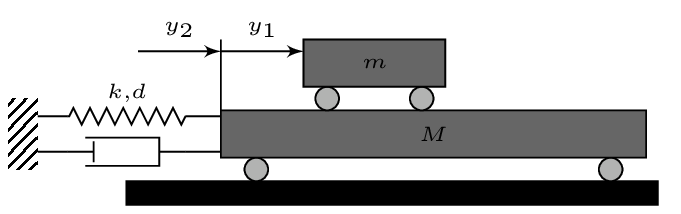

In [5]:
imag = Image("../images/zweimassenschwinger.png", width=300)
display(imag)

**Modellgleichungen**
\begin{align*}
    m (\ddot{y}_1 + \ddot{y}_2) & = u \\
    M \ddot{y}_2 + d \dot{y}_2 + k y_2 & = -u
\end{align*}
mit dem Zustand $x = (x_1,x_2,x_3,x_4)^{\intercal} = (y_1 + y_2, \dot{y}_1 + \dot{y}_2, y_2, \dot{y}_2)^{\intercal}$ und der Messung $y = y_1$
\begin{align*}
    \dot{x} & = A x + b u \\
    y & = c^{\intercal} x
\end{align*}

In [4]:
A = sp.Matrix([[0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, -k/M, -d/M]])
b = sp.Matrix([[0], [1/m], [0], [-1/M]])
c = sp.Matrix([[1], [0], [-1], [0]])
n = A.shape[0]
display(Latex("$A = {},\\quad b = {}, \\quad c^{{\\intercal}} = {}$".format(sp.latex(A), sp.latex(b), sp.latex(c.T))))

<IPython.core.display.Latex object>

**Übertragungsfunktion**

In [5]:
G = sp.simplify(c.T * (s * sp.eye(4) - A) ** -1 * b)[0]
display(Latex("$G(s) = {}$".format(sp.latex(G))))

<IPython.core.display.Latex object>

In [6]:
(Zs, Ns) = sp.fraction(G)
rho = sp.degree(Ns, gen=s) - sp.degree(Zs, gen=s)

In [7]:
display(Latex("relativer Grad: $\\varrho$ = grad$N(s)$ - grad$Z(s)$ $= {}$".format(sp.latex(rho))))

<IPython.core.display.Latex object>

## Beobachternormalform (BNF)

\begin{align*}
    \dot{x} & = \begin{pmatrix} 
        0 & 0 & \ldots & 0 & -a_{0}\\
        1 & 0 & \ddots & \vdots & -a_{1} \\
        0 & 1 & \ddots & \vdots & \vdots\\
        \vdots & \ddots & \ddots & 0 & -a_{n-2} \\
        0 & \ldots & \ldots & 1 & -a_{n-1} 
    \end{pmatrix} x + \begin{pmatrix} b_0 \\ b_1 \\ \vdots \\ b_{n-2} \\ b_{n-1} \end{pmatrix} u\\
    y & = \begin{pmatrix}
        0 & 0 & \ldots & 0 & 1
    \end{pmatrix} x
\end{align*}

**Beobachtbarkeitsmatrix**

In [8]:
O = c.T
for i in range(1, n):
    O = O.col_join(c.T * A ** i)
display(Latex("$O = {}$".format(sp.latex(O))))

<IPython.core.display.Latex object>

In [9]:
t1O = O ** -1 @ sp.eye(n, n)[:,-1]
TO =  t1O
for i in range(1, n):
    TO = sp.simplify(TO.row_join(A ** i * t1O))
display(Latex("$T_{{\\text{{BNF}}}} = {}$".format(sp.latex(TO))))

<IPython.core.display.Latex object>

In [10]:
ABNF= sp.simplify(TO ** -1 * A * TO)
bBNF = sp.simplify(TO ** -1 * b)
cBNF = (c.T * TO).T
display(Latex("$A_{{\\text{{BNF}}}} = {},\\quad b_{{\\text{{BNF}}}} = {}, \\quad c^{{\\intercal}}_{{\\text{{BNF}}}} = {}$".format(sp.latex(ABNF), sp.latex(bBNF), sp.latex(cBNF.T))))

<IPython.core.display.Latex object>

## Regelungsnormalform (RNF)

\begin{align*}
    \dot{x} & = \begin{pmatrix} 
        0 & 1 & 0 & \ldots & 0\\
        0 & 0 & 1 & \ddots & \vdots\\
        \vdots & \ddots & \ddots & \ddots & \vdots \\
        0 & \ldots & \ldots & 0 & 1\\
        -a_0 & -a_1 & \ldots & -a_{n-2} & -a_{n-1}
    \end{pmatrix} x + \begin{pmatrix} 0 \\ \vdots \\ \vdots \\ 0 \\ 1 \end{pmatrix} u\\
    y & = \begin{pmatrix}
        b_0 & b_1 & \ldots & b_{n-2} & b_{n-1}
    \end{pmatrix} x
\end{align*}

**Steuerbarkeitsmatrix**

In [11]:
S = b
for i in range(1, n):
    S = S.row_join(A ** i * b)
display(Latex("$S = {}$".format(sp.latex(S))))

<IPython.core.display.Latex object>

In [12]:
t1S =  sp.eye(n, n)[-1,:] * S ** -1
TS =  t1S
for i in range(1, n):
    TS = sp.simplify(TS.col_join(t1S * A ** i))
display(Latex("$T_{{\\text{{RNF}}}} = {}$".format(sp.latex(TS))))

<IPython.core.display.Latex object>

In [13]:
ARNF= sp.simplify(TS * A * TS ** -1)
bRNF = TS * b
cRNF = sp.simplify(c.T * TS ** -1).T
display(Latex("$A_{{\\text{{RNF}}}} = {},\\quad b_{{\\text{{RNF}}}} = {}, \\quad c^{{\\intercal}}_{{\\text{{RNF}}}} = {}$".format(sp.latex(ARNF), sp.latex(bRNF), sp.latex(cRNF.T))))

<IPython.core.display.Latex object>

## Eingangs-Ausgangs-Normalform (EANF)

\begin{align*}
    \dot{x} & = \begin{pmatrix} 
        0 & 1 & 0 & \vdots  & 0 & 0 & 0 & 0 & \ldots & 0\\
        0 & 0 & 1 & \ddots  & 0 & 0 & 0 & 0 & \ldots & 0\\
        \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
        0 & 0 & 0 & \ldots & 1 & 0 & 0 & 0 \ldots & 0 \\
        -\alpha_0 & -\alpha_1 & -\alpha_2 & \ldots & -\alpha_{\varrho-1} & -\alpha_{\varrho} & - \alpha_{\varrho + 1} & - \alpha_{\varrho+2} & \ldots & -\alpha_{n-1} \\
        0 & 0 & 0 & \ldots & 0 & 0 & 1 & 0 & \ldots & 0\\
        0 & 0 & 0 & \ldots & 0 & 0 & 0 & 1 & \ldots & 0\\
        \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
        0 & 0 & 0 & \ldots & 0 & 0 & 0 & 0 & \ldots & 1\\
        1 & 0 & 0 & \ldots & 0 & -b_0 & -b_1 & -b_2 & \ldots & -b_{q-1}\\
    \end{pmatrix} x + \begin{pmatrix} 0 \\ 0\\ \vdots \\ 0 \\ k \\ 0 \\ 0\\ \vdots \\ 0 \\ 0 \end{pmatrix} u\\
    y & = \begin{pmatrix}
        1 & 0 & 0 & \ldots & 0 & 0 & 0 & 0 & \ldots & 0
    \end{pmatrix} x
\end{align*}

In [14]:
k = cRNF[2]
TEA =  c.T
for i in range(1, rho):
    TEA = sp.simplify(TEA.col_join(c.T * A ** i))
for i in range(0, n - rho):
    TEA = sp.simplify(TEA.col_join(TS[i, :] * k))
display(Latex("$T_{{\\text{{EANF}}}} = {}$".format(sp.latex(TEA))))

<IPython.core.display.Latex object>

In [15]:
AEANF= sp.simplify(sp.expand(TEA * A * TEA ** -1))
bEANF = sp.simplify(TEA * b)
cEANF = sp.simplify(c.T * TEA ** -1)
display(Latex("$A_{{\\text{{EANF}}}} = {},\\quad b_{{\\text{{EANF}}}} = {}, \\quad c^{{\\intercal}}_{{\\text{{EANF}}}} = {}$".format(sp.latex(AEANF), sp.latex(bEANF), sp.latex(cEANF.T))))

<IPython.core.display.Latex object>